##### importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

##### importing dataset

In [2]:
train_data = pd.read_csv('C:/Users/User/Desktop/internship/archive/Genre Classification Dataset/train_data.txt',  delimiter = ":::", header=None, names=["id" ,'Title','Gener','Discreption'], engine='python' )
train_data.head()

,id,Title,Gener,Discreption
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           54214 non-null  int64 
 1   Title        54214 non-null  object
 2   Gener        54214 non-null  object
 3   Discreption  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [4]:
train_data.isnull().sum()

id             0
Title          0
Gener          0
Discreption    0
dtype: int64

##### Visualizing data

<AxesSubplot:>

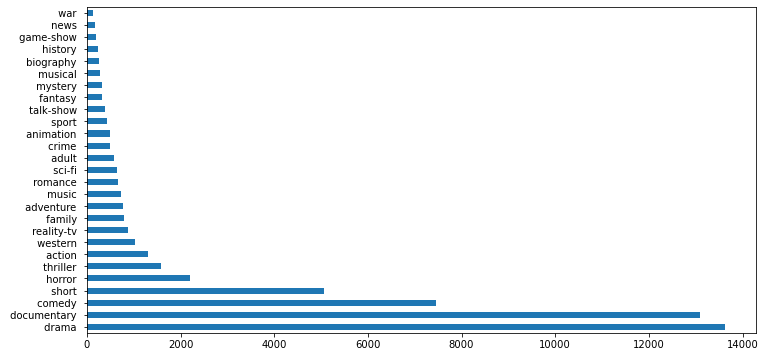

In [5]:
plt.figure(figsize=(12,6))
train_data['Gener'].value_counts().plot.barh()

##### Cleaning data

In [6]:
## Check for Duplicates and Remove them
train_data.duplicated().sum() ## Will give us a number of duplicates

train_data.drop_duplicates(inplace = True)  ## Will drops any duplicates

##### label encoding

In [7]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
# Fit and transform the 'Gener' column
train_data['Gener_encoded'] = label_encoder.fit_transform(train_data['Gener'])
train_data.head()

,id,Title,Gener,Discreption,Gener_encoded
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,8
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,24
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,1
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,8
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,8


In [8]:
Y_train = train_data['Gener_encoded']
Y_train.head()

0     8
1    24
2     1
3     8
4     8
Name: Gener_encoded, dtype: int32

In [9]:
X_train = train_data['Discreption']
X_train.head()

0     Listening in to a conversation between his do...
1     A brother and sister with a past incestuous r...
2     As the bus empties the students for their fie...
3     To help their unemployed father make ends mee...
4     The film's title refers not only to the un-re...
Name: Discreption, dtype: object

In [10]:
print(X_train.shape)

(54214,)


#####  importing test dataset

In [11]:
test_data = pd.read_csv('C:/Users/User/Desktop/internship/archive/Genre Classification Dataset/test_data.txt',  delimiter = ":::", header=None, names=["id" ,'Title','Discreption'], engine='python') 
test_data.head()

,id,Title,Discreption
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [12]:
X_test = test_data['Discreption']
X_test.head()

0     L.R. Brane loves his life - his car, his apar...
1     Spain, March 1964: Quico is a very naughty ch...
2     One year in the life of Albin and his family ...
3     His father has died, he hasn't spoken with hi...
4     Before he was known internationally as a mart...
Name: Discreption, dtype: object

In [13]:
print(X_test.shape)

(54200,)


In [14]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english',lowercase=True)

# Convert the training and testing text messages into numerical features using TF-IDF

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)


In [15]:
print(X_train_features)

  (0, 13413)	0.1303132428647294
  (0, 80237)	0.1821079708460167
  (0, 104711)	0.14745244623799802
  (0, 19998)	0.1090134458123681
  (0, 9219)	0.19107204420021867
  (0, 33201)	0.19920174966015627
  (0, 24051)	0.19284163839884727
  (0, 83109)	0.12784279167808804
  (0, 40532)	0.07894399415477685
  (0, 22429)	0.10391455554534515
  (0, 63656)	0.068230845346714
  (0, 62369)	0.05396455493266389
  (0, 4418)	0.1364925834937789
  (0, 19433)	0.152326698049878
  (0, 117756)	0.16042367496919674
  (0, 51026)	0.13737408730952422
  (0, 118311)	0.18100233420912473
  (0, 84637)	0.11701194539669875
  (0, 36282)	0.11234882358846689
  (0, 37137)	0.18514123041122094
  (0, 112992)	0.11953772762734183
  (0, 6443)	0.1456374274802404
  (0, 20438)	0.13020460321048605
  (0, 101751)	0.18100233420912473
  (0, 49499)	0.11651047209220508
  :	:
  (54213, 88166)	0.18118465962883884
  (54213, 658)	0.1815792497751359
  (54213, 28124)	0.17147983980314732
  (54213, 117563)	0.19307142214579276
  (54213, 39209)	0.18066713789

In [16]:
print(X_test_features)

  (0, 118135)	0.07822770441633309
  (0, 117691)	0.14447247419367615
  (0, 114370)	0.74630543016286
  (0, 110067)	0.08767374887855998
  (0, 109254)	0.12455510930168262
  (0, 108984)	0.12374406692522356
  (0, 102918)	0.08884173837992634
  (0, 102820)	0.08919215969253409
  (0, 102696)	0.105077512906662
  (0, 97677)	0.17805539534066755
  (0, 96689)	0.18047626164525166
  (0, 92291)	0.18324531315465295
  (0, 89995)	0.08346167077142436
  (0, 86254)	0.11536529813500347
  (0, 76258)	0.12957423872568788
  (0, 69885)	0.10796686953859519
  (0, 69693)	0.08864449726689408
  (0, 63698)	0.09445269758797326
  (0, 62369)	0.08850628424386749
  (0, 55222)	0.07631664364875163
  (0, 43746)	0.09963075241005959
  (0, 43052)	0.08499899524854594
  (0, 38528)	0.09422887293253682
  (0, 36182)	0.1966043925703469
  (0, 35809)	0.09578412027414542
  :	:
  (54199, 63599)	0.18698789478450928
  (54199, 63435)	0.09747517759754493
  (54199, 62961)	0.0649218846294363
  (54199, 62430)	0.0987451085455045
  (54199, 52701)	0.1

In [17]:
print(Y_train)

0         8
1        24
2         1
3         8
4         8
         ..
54209     5
54210    13
54211     7
54212     5
54213    12
Name: Gener_encoded, Length: 54214, dtype: int32


In [18]:
test_data_solution = pd.read_csv('C:/Users/User/Desktop/internship/archive/Genre Classification Dataset/test_data_solution.txt',  delimiter = ":::", header=None, names=["id" ,'Title','Gener','Discreption'], engine='python' )
test_data_solution.head()

,id,Title,Gener,Discreption
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [19]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
# Fit and transform the 'Gener' column
test_data_solution['Gener_encoded'] = label_encoder.fit_transform(test_data_solution['Gener'])
test_data_solution.head()

,id,Title,Gener,Discreption,Gener_encoded
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar...",24
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch...",5
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...,7
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi...",8
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...,8


In [20]:
Y_test = test_data_solution['Gener_encoded']
Y_test.head()

0    24
1     5
2     7
3     8
4     8
Name: Gener_encoded, dtype: int32

##### Logistic Regression 

In [21]:
model = MultinomialNB()
model.fit(X_train_features,Y_train)

MultinomialNB()

In [22]:
# Model evaluation
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

# Print accuracy
print('Accuracy on training data: {} %'.format(accuracy_on_training_data * 100))
print('Accuracy on test data: {} %'.format(accuracy_on_test_data * 100))

Accuracy on training data: 47.12066993765448 %
Accuracy on test data: 44.474169741697416 %


##### Naive Bayes classifier

In [23]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_features,Y_train)

LogisticRegression(max_iter=1000)

In [24]:
# Model evaluation
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

# Print accuracy
print('Accuracy on training data: {} %'.format(accuracy_on_training_data * 100))
print('Accuracy on test data: {} %'.format(accuracy_on_test_data * 100))

Accuracy on training data: 72.00723060464087 %
Accuracy on test data: 58.82841328413284 %
